# Exploratory Data Analysis of the Preprocessed Dataset

In [1]:
# Importing necessary libraries for exploratory data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing
In this section we will be reading a data from a csv. Here will be using the preprocessed test_final, train_final, and val_final csv files that may have contains derogatory tweets from twitter users.

In [2]:
# Load the data into pandas dataframe and check the data structure
df1 = pd.read_csv("../res/test_final.csv")
df2 = pd.read_csv("../res/train_final.csv")
df3 = pd.read_csv("../res/val_final.csv")

df_raw = pd.concat([df1, df2, df3], axis=0)
df_raw.head()

,text,HATE,NOT,OFFN,PRFN,Race,Religion,Gender,Other,None
0,its about time blacks realised the women who s...,1,0,0,1,0,1,0,0,0
1,the islamic and sharia controlled middle easte...,0,0,1,1,0,1,0,0,0
2,so now you are calling yourself whoever agrees...,0,0,1,1,0,0,0,0,1
3,a million thumbs up we need museums of victims...,0,1,0,1,1,0,0,0,0
4,these your kike bosses too feldman is cernovic...,1,0,0,1,0,1,0,0,0


## Dataset and Data Attributes
Here, we're going to check the attributes of the dataset for us to have a better understanding of the dataset we are working on. We are also dropping unnecessary columns to have a cleaner process of  exploratory data analysis.


In [3]:
# Check the number of rows and columns
print("Number of rows in test_final dataset: ", df1.shape[0])
print("Number of rows in train_final dataset: ", df2.shape[0])
print("Number of rows in val_final dataset: ", df3.shape[0])

print("Number of rows in all dataset =",df_raw.shape[0])
print("Number of columns in all dataset =",df_raw.shape[1])

Number of rows in test_final dataset:  2885
Number of rows in train_final dataset:  13460
Number of rows in val_final dataset:  2884
Number of rows in all dataset = 19229
Number of columns in all dataset = 10


In [4]:
# Drop 'text' column
df_raw.drop(columns=['text'], inplace=True)
df_raw.head()

,HATE,NOT,OFFN,PRFN,Race,Religion,Gender,Other,None
0,1,0,0,1,0,1,0,0,0
1,0,0,1,1,0,1,0,0,0
2,0,0,1,1,0,0,0,0,1
3,0,1,0,1,1,0,0,0,0
4,1,0,0,1,0,1,0,0,0


In [5]:
# Check the data types of each column
df_raw.dtypes

HATE        int64
NOT         int64
OFFN        int64
PRFN        int64
Race        int64
Religion    int64
Gender      int64
Other       int64
None        int64
dtype: object

## Data Visualization and Interpretation
In this section, we are going to visualize the dataset that we have by using graphs. With these, we would be able to have a better understanding of the statistics of different hate speech categories based on the tweets of Twitter users. We will also provide interpretations and insights into each visualization.


C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


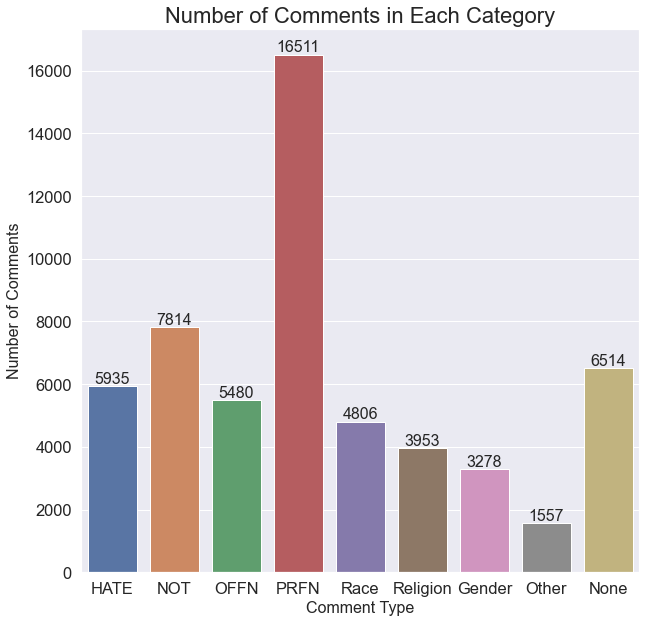

In [6]:
# Count the number of comments under each label.
categories = list(df_raw.columns.values)
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))

ax= sns.barplot(categories, df_raw.iloc[:,:].sum().values)
plt.title("Number of Comments in Each Category", fontsize=22)
plt.ylabel('Number of Comments', fontsize=16)
plt.xlabel('Comment Type', fontsize=16)
# #adding the text labels
rects = ax.patches
labels = df_raw.iloc[:,:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


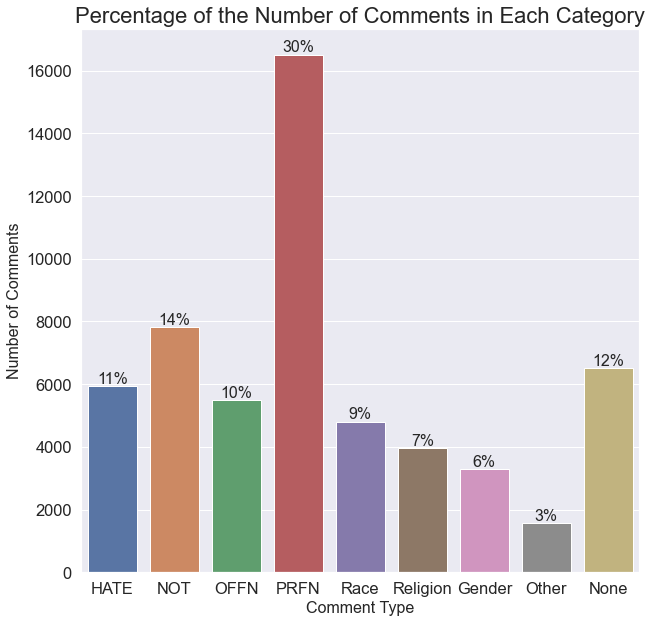

In [7]:
# Count the number of comments under each label.
categories = list(df_raw.columns.values)
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))

ax= sns.barplot(categories, df_raw.iloc[:,:].sum().values)
plt.title("Percentage of the Number of Comments in Each Category", fontsize=22)
plt.ylabel('Number of Comments', fontsize=16)
plt.xlabel('Comment Type', fontsize=16)
# #adding the text labels
rects = ax.patches
labels = df_raw.iloc[:,:].sum().values
total = sum(labels)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    percent = round((label/total)*100)
    ax.text(rect.get_x() + rect.get_width()/2, height, str(percent) + '%', ha='center', va='bottom', fontsize=16)
plt.show()

By looking at the graphs, we can see the number comments in each category. We observed that between the HATE and NOT categories, 5935 or 43% of the comments in our dataset is in the HATE category. This means that half of our dataset contains hateful comments or tweets. Next, among the HATE, OFFN, and PRFN categories, PRFN is leading with 16511 comments. This means that the most hateful comments are directed towards profanity. Lastly, for the hateful speech towards targeted groups, the most targeted group is the race group. This only means that racism is rampant on Twitter based on the dataset used.

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


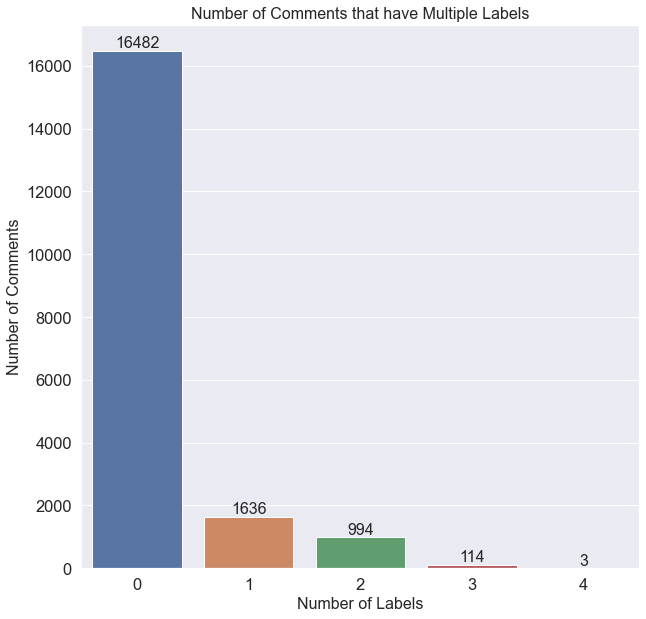

In [8]:
# Counting the number of comments having multiple labels.
rowSums = df_raw.iloc[:,4:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[:]
sorted_index = multiLabel_counts.index.sort_values(ascending=True)
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))
ax = sns.barplot(sorted_index, multiLabel_counts.values)
plt.title("Number of Comments that have Multiple Labels", fontsize=16)
plt.ylabel('Number of Comments', fontsize=16)
plt.xlabel('Number of Labels', fontsize=16)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


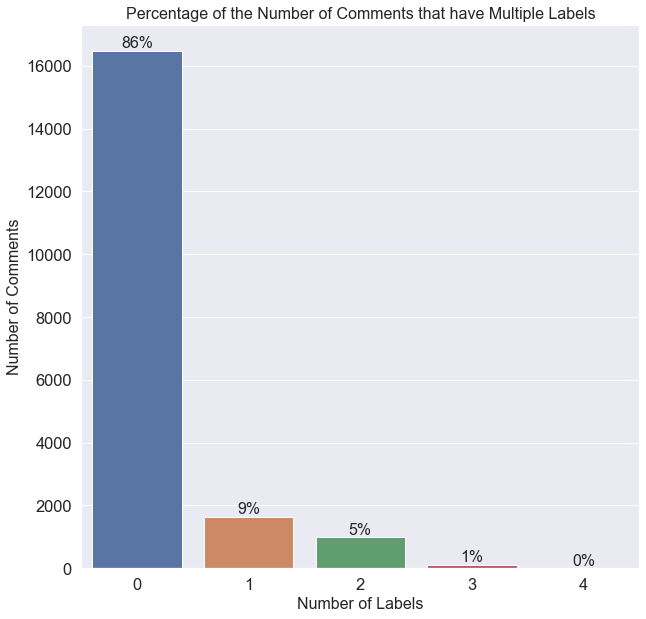

In [9]:
# Percentage of the number of comments having multiple labels.
rowSums = df_raw.iloc[:,4:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[:]
sorted_index = multiLabel_counts.index.sort_values(ascending=True)
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))
ax = sns.barplot(sorted_index, multiLabel_counts.values)
plt.title("Percentage of the Number of Comments that have Multiple Labels", fontsize=16)
plt.ylabel('Number of Comments', fontsize=16)
plt.xlabel('Number of Labels', fontsize=16)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
total = multiLabel_counts.values.sum()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    percent = round(((label/total)*100))
    ax.text(rect.get_x() + rect.get_width()/2, height, str(percent) + '%', ha='center', va='bottom', fontsize=16)
plt.show()

On the graph, we can see the comments that have multiple labels. The labels are the categories of hate speech towards specific group, which are Race, Religion, Gender, Others, and None. Having multiple labels in a comment means that more categories of hate speech are committed. On the graph, we observed that most of the comments only have one label, with 86% of the comments. This means that most of the tweets have only one type of hate speech category in the context of their comments.